In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFilter
from PIL import ImageChops
from PIL import ImageOps
from PIL import ImageEnhance
from PIL import ImageStat as stat

(448, 745) RGB


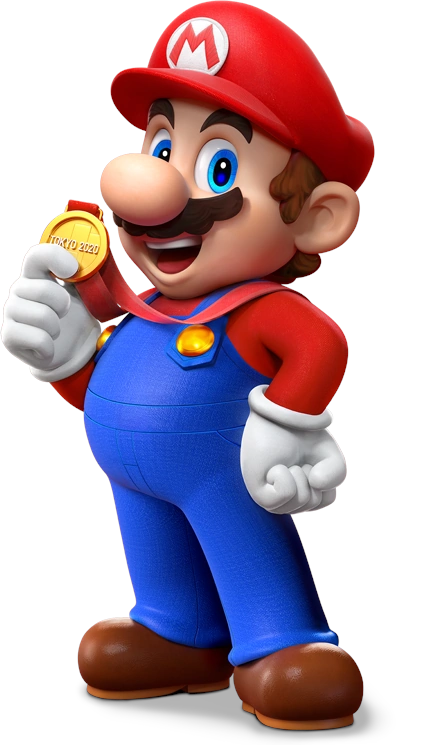

In [5]:
im = Image.open('postac.png')
im = im.convert('RGB')
print(im.size, im.mode)
im

In [6]:
def statystyki(im):
    s = stat.Stat(im)
    return {
        "Ekstrema: ": s.extrema,
        "Ilość pikseli: ": s.count,
        "Średnia: ": s.mean,
        "Mediana: ": s.median,
        "Odchylenie std:": s.stddev
    }

<center><h1>Zadanie 1</h1>
<h2>ppkt a:</h2></center>

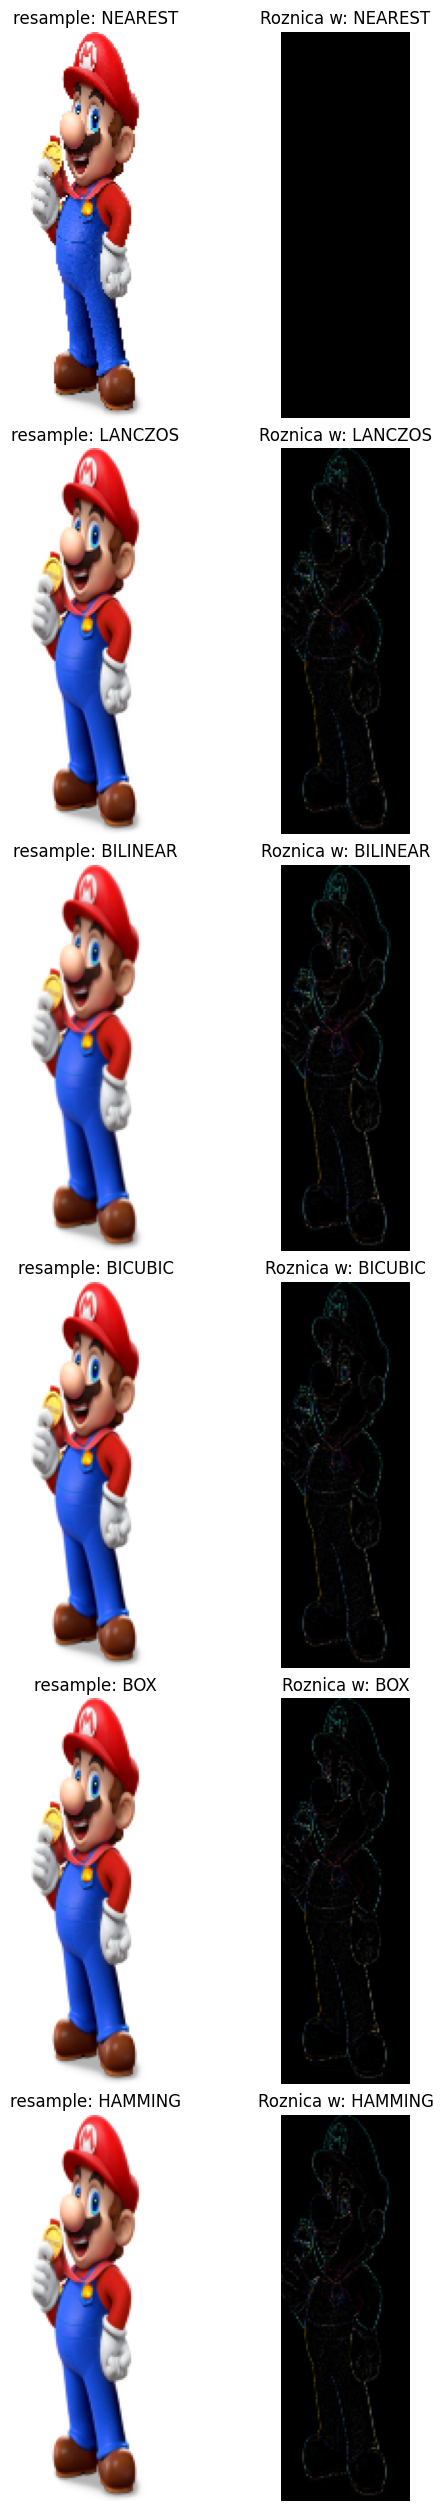

In [15]:
w, h = im.size
s_w = 0.15
s_h = 0.27

resample_method =['NEAREST', 'LANCZOS', 'BILINEAR', 'BICUBIC', 'BOX', 'HAMMING']
roznice = dict()

im_N = im.resize((int(w * s_w), int(h * s_h)), 0)
i = 1

plt.figure(figsize=(5, 25), layout='constrained')

for t in range(6):
    file_name = "resample: "+ str(resample_method[t])

    im_r = im.resize((int(w * s_w), int(h * s_h)), t)
    plt.subplot(6, 2, i)
    plt.title(str(file_name))
    plt.imshow(im_r, )
    plt.axis('off')

    i +=1

    diff = ImageChops.difference(im_N, im_r)
    roznice[resample_method[t]] = statystyki(diff)
    s = stat.Stat(diff)
    plt.subplot(6, 2, i)
    plt.title(f'Roznica w: {resample_method[t]}')
    plt.imshow(diff)
    plt.axis('off')

    i +=1

# plt.savefig('fig1.png')

In [20]:
for resampling in roznice:
    print(f'{resampling}:'.center(50), '\n')
    for statystyka in roznice.get(resampling):
        print(statystyka, ' ', roznice.get(resampling).get(statystyka))
    print('\n', '-'*50, '\n')

                     NEAREST:                      

Ekstrema:    [(0, 0), (0, 0), (0, 0)]
Ilość pikseli:    [13467, 13467, 13467]
Średnia:    [0.0, 0.0, 0.0]
Mediana:    [0, 0, 0]
Odchylenie std:   [0.0, 0.0, 0.0]

 -------------------------------------------------- 

                     LANCZOS:                      

Ekstrema:    [(0, 127), (0, 123), (0, 123)]
Ilość pikseli:    [13467, 13467, 13467]
Średnia:    [3.6965174129353233, 4.372243261305413, 4.38612905621148]
Mediana:    [1, 1, 1]
Odchylenie std:   [8.568727069234958, 10.504235937902552, 10.622700735437203]

 -------------------------------------------------- 

                    BILINEAR:                      

Ekstrema:    [(0, 136), (0, 129), (0, 123)]
Ilość pikseli:    [13467, 13467, 13467]
Średnia:    [4.126457265909259, 4.866711220019306, 4.980842058364892]
Mediana:    [0, 0, 0]
Odchylenie std:   [9.649618848837253, 11.802242137839997, 11.959471724554843]

 -------------------------------------------------- 

      

<center><h1>Zadanie 1</h1>
<h2>ppkt b:</h2></center>

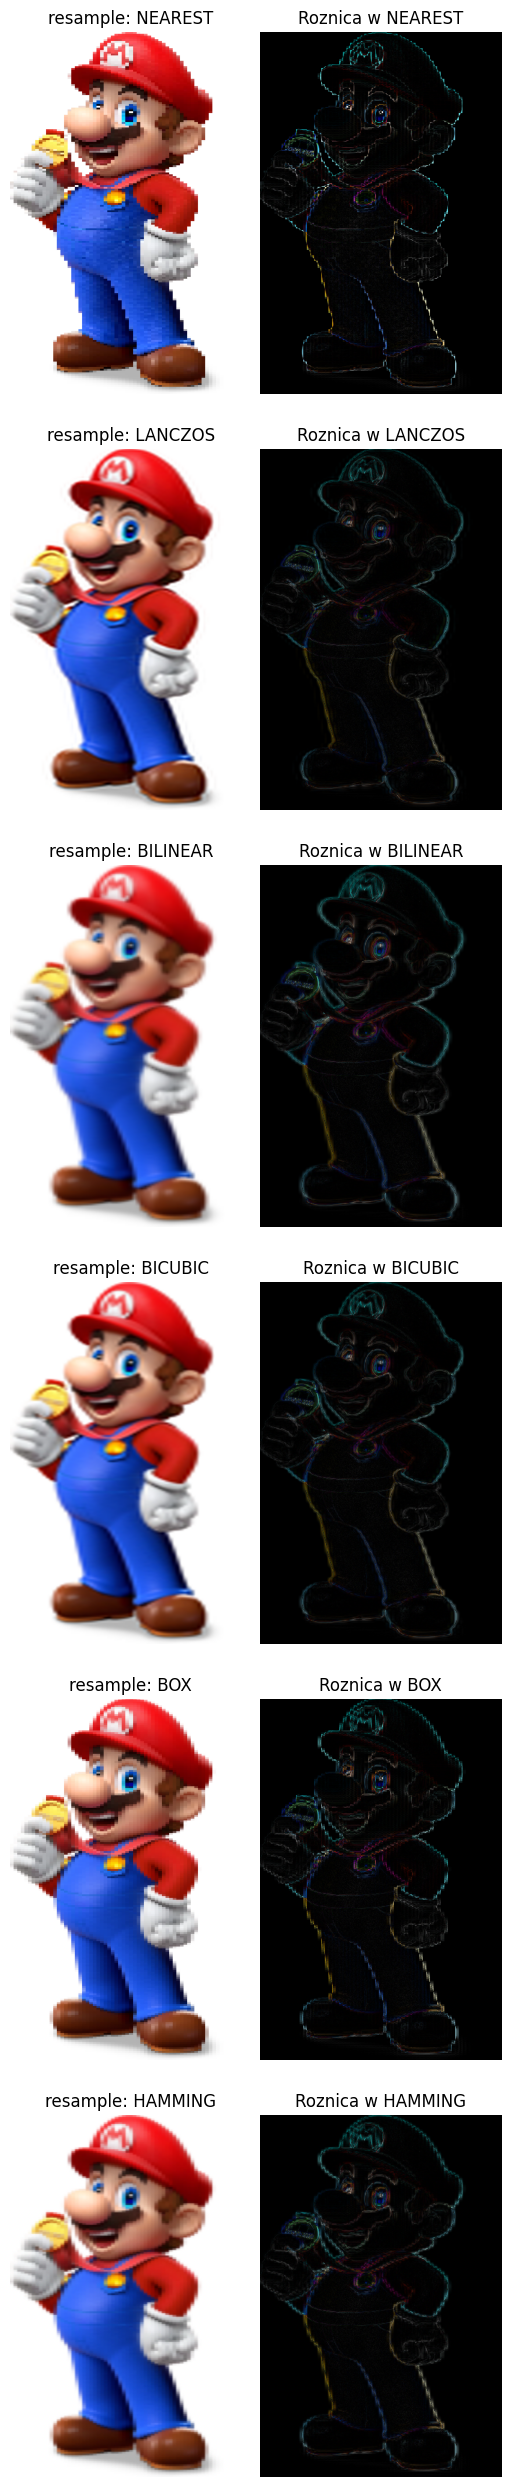

In [22]:
w, h = im.size

s_w_N = 0.15    # pierwsza skala
s_h_N = 0.27    # pierwsza skala

w, h = (w * s_w_N, h * s_h_N)   # podmiana oryginalnych wymiarów na przeskalowane w ppkt 1a

s_w_Nb = int(1/0.15)    # druga skala
s_h_Nb = int(1/0.27)    # druga skala

resample_method =['NEAREST', 'LANCZOS', 'BILINEAR', 'BICUBIC', 'BOX', 'HAMMING']
roznice = dict()

im_Nb = im.resize((int(w * s_w_Nb), int(h * s_h_Nb)), 0)

i = 1
plt.figure(figsize=(5, 25), layout='constrained')
for t in range(6):
    file_name = "resample: "+ str(resample_method[t])

    im_r = im.resize((int(w), int(h)), t)   # pierwsze użycie resamplingu
    im_r = im_r.resize((int(w * s_w_Nb), int(h * s_h_Nb)), t)   # drugie użycie resamplingu
    plt.subplot(6, 2, i)
    plt.title(str(file_name))
    plt.imshow(im_r)
    plt.axis('off')

    i += 1

    diff = ImageChops.difference(im_Nb, im_r)
    roznice[resample_method[t]] = statystyki(diff)
    s = stat.Stat(diff)
    plt.subplot(6, 2, i)
    plt.title(f'Roznica w {resample_method[t]}')
    plt.imshow(diff)
    plt.axis('off')

    i += 1

# plt.savefig('fig2.png')

In [23]:
print('Oryginalny rozmiar: ', im.size)
print('Rozmiar obrazow z pkt 1b: ', im_r.size, '\n')
print('Oryginalny rozmiar zostal przeskalowany o: ', f'({(s_w_N * s_w_Nb)}, {(s_h_N * s_h_Nb)})')

print(f'Dowód: ({int(im.size[0] * s_w_N * s_w_Nb)}, {int(im.size[1] * s_h_N * s_h_Nb)})')

for resampling in roznice:
    print(f'{resampling}:'.center(50), '\n')
    for statystyka in roznice.get(resampling):
        print(statystyka, ' ', roznice.get(resampling).get(statystyka))
    print('\n', '-'*50, '\n')

Oryginalny rozmiar:  (448, 745)
Rozmiar obrazow z pkt 1b:  (403, 603) 

Oryginalny rozmiar zostal przeskalowany o:  (0.8999999999999999, 0.81)
Dowód: (403, 603)
                     NEAREST:                      

Ekstrema:    [(0, 255), (0, 255), (0, 255)]
Ilość pikseli:    [243009, 243009, 243009]
Średnia:    [5.170121271228638, 5.72453695130633, 6.003362015398607]
Mediana:    [0, 0, 0]
Odchylenie std:   [16.05261703698884, 19.409900511909385, 19.894793663911816]

 -------------------------------------------------- 

                     LANCZOS:                      

Ekstrema:    [(0, 166), (0, 173), (0, 176)]
Ilość pikseli:    [243009, 243009, 243009]
Średnia:    [4.33220991815118, 5.109234637400261, 5.168055504117132]
Mediana:    [1, 1, 1]
Odchylenie std:   [9.70318672502153, 11.945438223103409, 12.109624100744657]

 -------------------------------------------------- 

                    BILINEAR:                      

Ekstrema:    [(0, 184), (0, 178), (0, 172)]
Ilość pikseli: 

<center>
<h1>Zadanie 2</h1>
</center>

(896, 2235)


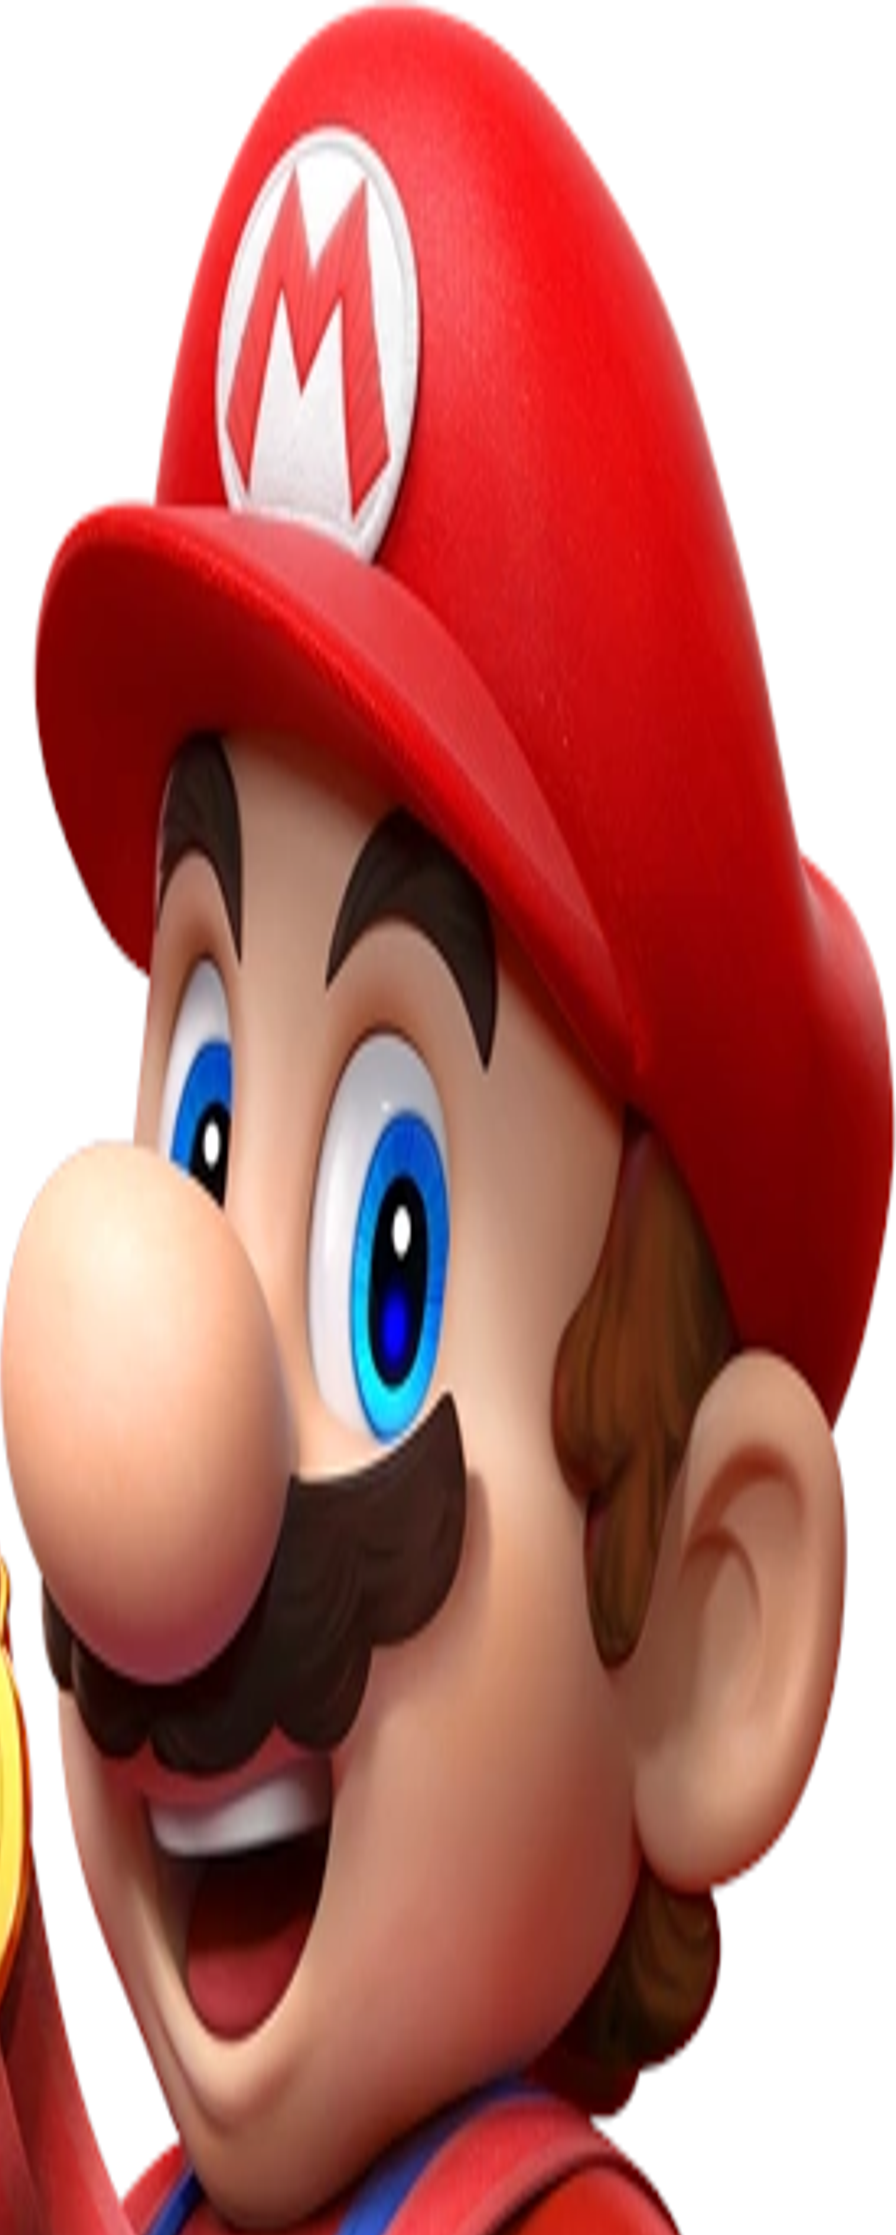

In [50]:
im = Image.open('postac.png')

w_p, h_p, w_k, h_k = (100, 0, 375, 300)

wycinek = (w_p, h_p, w_k, h_k)  # definicja miejsca wycięcia: w_p, h_p - lewy górny róg, w_k, h_k prawy dolny róg
wyc_w = wycinek[2] - wycinek[0] # szerokość wycinka
wyc_h = wycinek[3] - wycinek[1] # wysokość wycinka
s_w = 2 # skala szerokości
s_h = 3 # skala wysokości
glowa = im.resize((im.size[0] * s_w, im.size[1] * s_h), box = wycinek)
print(glowa.size)
glowa

(550, 900)


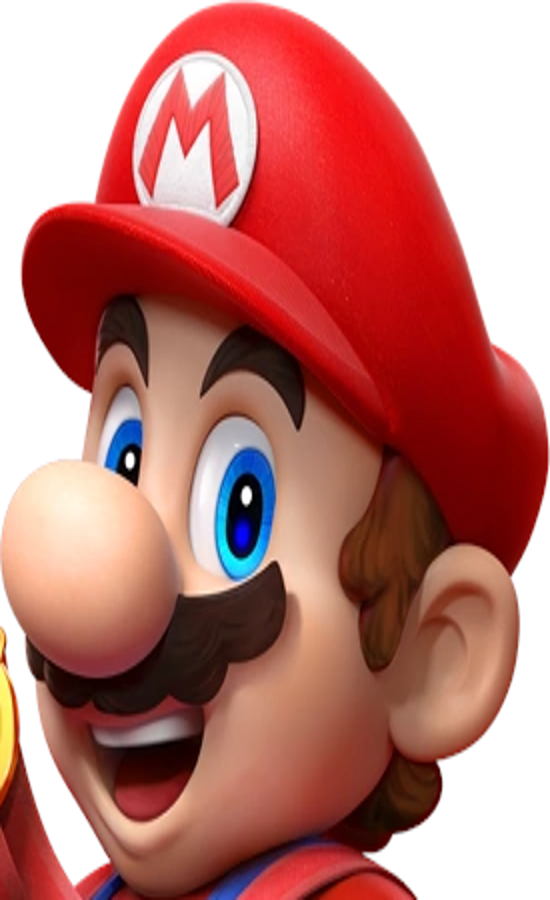

In [27]:
glowa1 = im.crop(box=wycinek)
glowa1 = glowa1.resize(size=(s_w * wyc_w, s_h * wyc_h))
print(glowa1.size)
glowa1

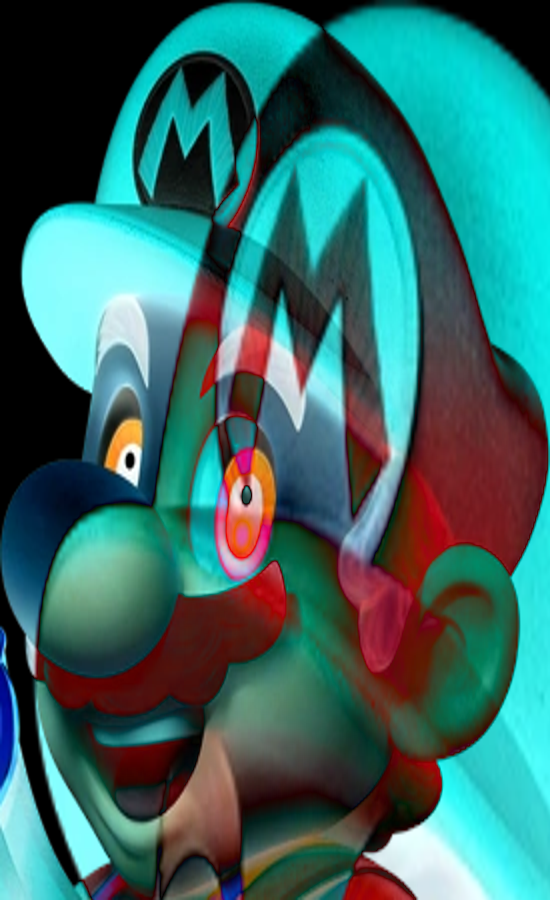

In [71]:
diff = ImageChops.difference(glowa.convert('RGB'), glowa1.convert('RGB'))
diff

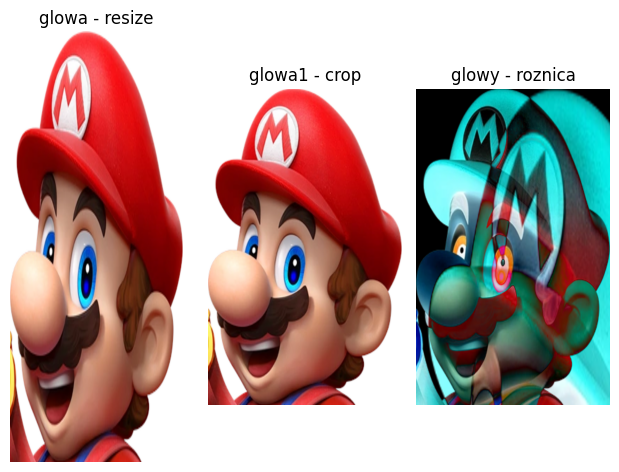

In [43]:
plt.figure()

plt.subplot(1, 3, 1)
plt.title('glowa - resize')
plt.axis('off')
plt.imshow(glowa.convert('RGB'))

plt.subplot(1, 3, 2)
plt.title('glowa1 - crop')
plt.axis('off')
plt.imshow(glowa1.convert('RGB'))

plt.subplot(1, 3, 3)
plt.title('glowy - roznica')
plt.axis('off')
plt.imshow(diff)

plt.tight_layout()
# plt.savefig('fig3.png')

<center>
<h1>Zadanie 3</h1>
<h2></h2>
</center>

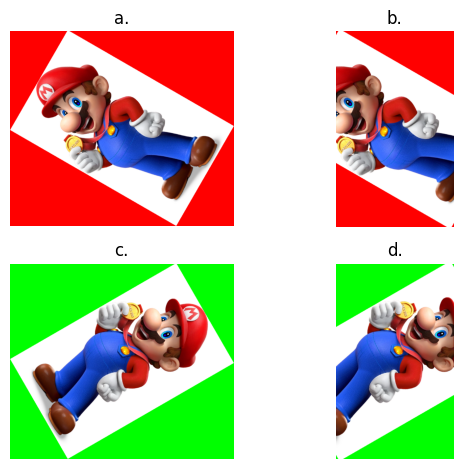

In [73]:
plt.figure()

plt.subplot(2, 2, 1)
plt.imshow(im.rotate(60, expand=1, fillcolor=(255, 0, 0)))
plt.title('a.')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(im.rotate(60, fillcolor=(255, 0, 0)))
plt.title('b.')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(im.rotate(360-60, expand=1, fillcolor=(0, 255, 0)))
plt.title('c.')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(im.rotate(360-60, fillcolor=(0, 255, 0)))
plt.title('d.')
plt.axis('off')

plt.tight_layout()
# plt.savefig('fig4.png')

<center>
<h1>Zadanie 4</h1>
<h2></h2>
</center>

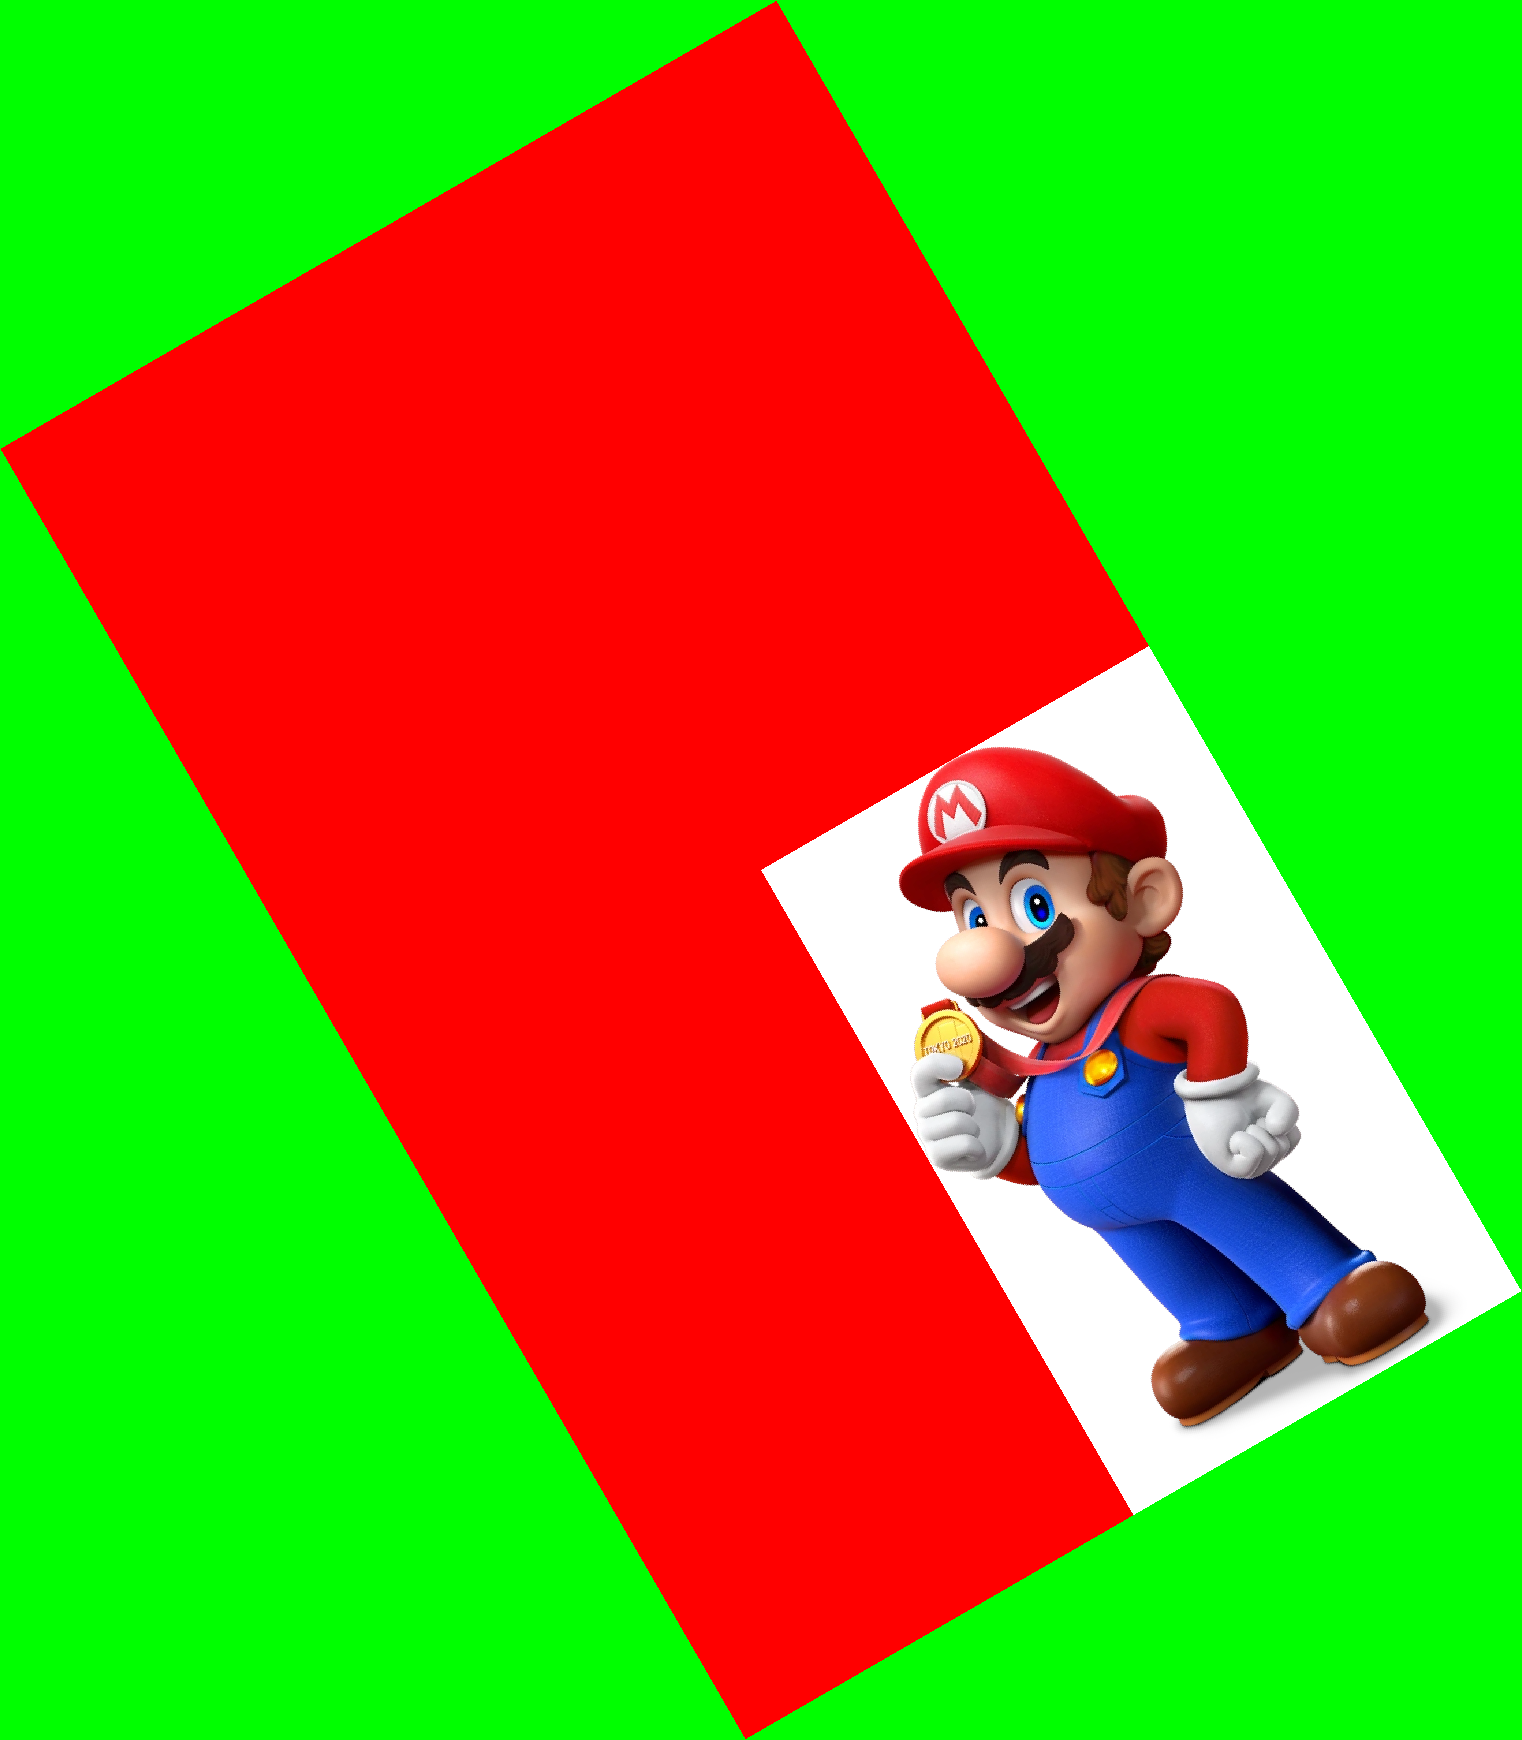

In [62]:
x, y = im.size
tlo = Image.new('RGB', (x*2, y*2), (255, 0, 0))
tlo.paste(im, (x, y))
tlo = tlo.rotate(30, expand=1, fillcolor=(0, 255, 0))
# tlo.save('obrot.png')
tlo

<center>
<h1>Zadanie 5</h1>
<h2></h2>
</center>

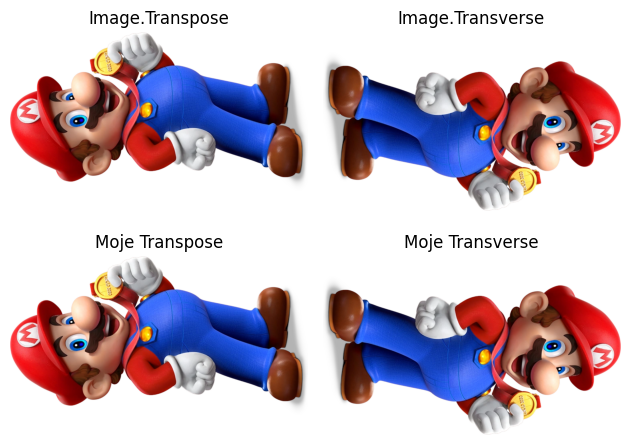

In [240]:
plt.figure()

plt.subplot(2, 2, 1)
plt.title('Image.Transpose')
plt.imshow(im.transpose(Image.Transpose.TRANSPOSE))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Image.Transverse')
plt.imshow(im.transpose(Image.Transpose.TRANSVERSE))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Moje Transpose')
plt.imshow(im.rotate(270, expand=1).transpose(Image.Transpose.FLIP_LEFT_RIGHT))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Moje Transverse')
plt.imshow(im.rotate(90, expand=1).transpose(Image.Transpose.FLIP_LEFT_RIGHT))
plt.axis('off')

plt.tight_layout()

<br/><center>Próba wykonania przekształceń bez odbicia lustrzanego Image.FLIP_LEFT_RIGHT</center>

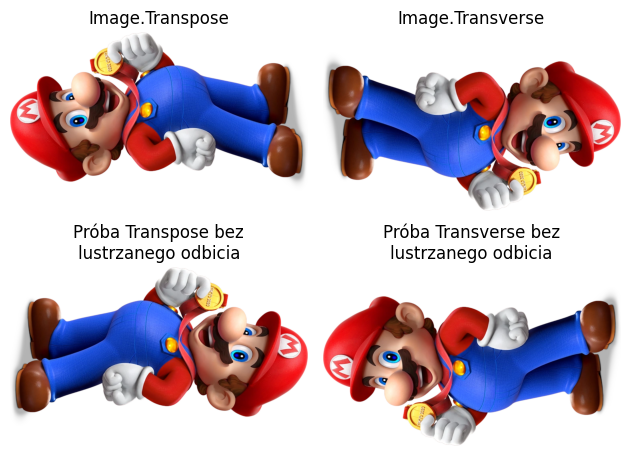

In [68]:
plt.figure()

plt.subplot(2, 2, 1)
plt.title('Image.Transpose')
plt.imshow(im.transpose(Image.Transpose.TRANSPOSE))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Image.Transverse')
plt.imshow(im.transpose(Image.Transpose.TRANSVERSE))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Próba Transpose bez\nlustrzanego odbicia')
plt.imshow(im.rotate(270, expand=1))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Próba Transverse bez\nlustrzanego odbicia')
plt.imshow(im.rotate(90, expand=1))
plt.axis('off')

plt.tight_layout()